In [67]:
"""
Applying some ML algos to the MNIST dataset (supervised learning)
"""

'\nApplying some ML algos to the MNIST dataset (supervised learning)\n'

In [68]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import sklearn as skl
import time 
import pickle
import os
import matplotlib.pyplot as plt 
%matplotlib inline 



from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier 
import xgboost as xg


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score


In [69]:
file ='/Users/rahulseth/Desktop/Repos/MachineLearning/MNIST/mnist_train.csv'
df = pd.read_csv(file)
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

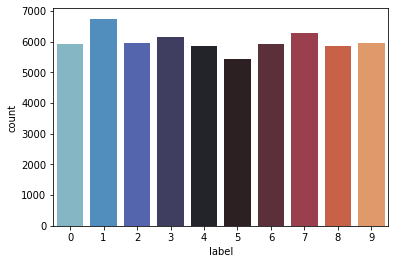

In [72]:
# Checking how the data looks 
sns.countplot(df['label'], palette='icefire')


In [73]:
"""
Split data in train and test set
Very generous training size assigned as of now
"""
X = df.iloc[:,1:].values/255
y = df.iloc[:,0]

X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

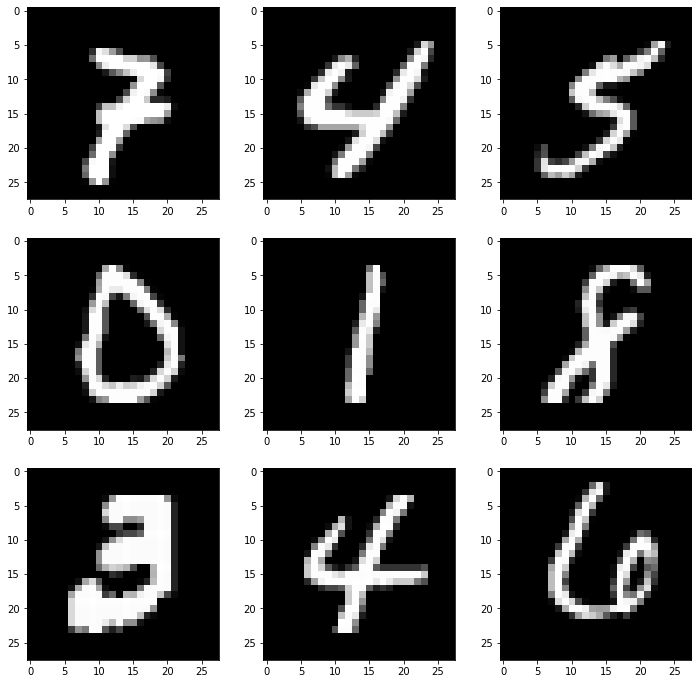

In [74]:
"""
Plotting some random digits from the dataset. 
The values of each pixel have been normalized between 0-255.
"""
fig, ax = plt.subplots(3,3, figsize=(12,12))

for i in range(9):
    nums = np.reshape(X_train[i], (28,28))
    plt.subplot(3,3,i+1)
    plt.imshow(nums, cmap='gray', interpolation='None')
    plt.gca().grid(False)


In [75]:
models = {
    'SVM-Linear': SVC(kernel='linear'),
    'SVM-Non Linear': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forrest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'KMeans': KMeans(n_clusters=len(np.unique(y_train))),
    'XG': xg.XGBClassifier()
}
models

{'SVM-Linear': SVC(kernel='linear'),
 'SVM-Non Linear': SVC(),
 'Decision Tree': DecisionTreeClassifier(max_depth=5),
 'Random Forrest': RandomForestClassifier(),
 'Ada Boost': AdaBoostClassifier(),
 'KMeans': KMeans(n_clusters=10),
 'XG': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, random_state=None,
               reg_alpha=None, reg_lambda=None, ...)}

In [76]:
metrics = {}

for name, model in models.items():
  print("Training Data using: {}".format(name))
  start = time.time()
  model.fit(X_train, y_train)
  end = time.time()
  file = '{}.sav'.format(name)
  
  try:
    pickle.dump(model, open(file, 'wb')) # saving each model incase, I want to reuse it later
    print("Saved!")
  except Exception as e:
    print("Unable to save model {}".format(name) + ":" + str(e))

  m = {}
  m['training time'] = round(end-start)
  metrics[name]= m
print("All done!")

Training Data using: SVM-Linear
Saved!
Training Data using: SVM-Non Linear
Saved!
Training Data using: Decision Tree
Saved!
Training Data using: Random Forrest
Saved!
Training Data using: Ada Boost
Saved!
Training Data using: KMeans
Saved!
Training Data using: XG
Saved!
All done!


In [77]:
metrics

{'SVM-Linear': {'training time': 121},
 'SVM-Non Linear': {'training time': 127},
 'Decision Tree': {'training time': 4},
 'Random Forrest': {'training time': 26},
 'Ada Boost': {'training time': 52},
 'KMeans': {'training time': 29},
 'XG': {'training time': 1002}}

In [78]:
for name, model in models.items():
  print("Starting predictions and calcs for {}".format(name))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  start = time.time()
  y_pred = model.predict(X_test)
  end = time.time()

  m = {}
  m['model'] = name
  m['f1'] = f1_score(y_test, y_pred, average='macro')
  m['accuracy'] = accuracy_score(y_test,y_pred)
  m['recall'] = recall_score(y_test,y_pred, average='macro')
  m['precsion'] = precision_score(y_test, y_pred, average='macro')
  m['pred time'] = round(end-start)
  metrics[name].update(m)

Starting predictions and calcs for SVM-Linear
Starting predictions and calcs for SVM-Non Linear
Starting predictions and calcs for Decision Tree
Starting predictions and calcs for Random Forrest
Starting predictions and calcs for Ada Boost
Starting predictions and calcs for KMeans
Starting predictions and calcs for XG


In [79]:
results = pd.DataFrame(metrics).transpose()
results[['accuracy', 'recall', 'f1', 'precsion']] = round(100*results[['accuracy', 'recall', 'f1', 'precsion']])
results

,training time,model,f1,accuracy,recall,precsion,pred time
SVM-Linear,121,SVM-Linear,93.181998,93.272222,93.177404,93.212607,55
SVM-Non Linear,127,SVM-Non Linear,97.525504,97.544444,97.534553,97.522534,115
Decision Tree,4,Decision Tree,67.289138,67.911111,67.370956,69.035241,0
Random Forrest,26,Random Forrest,96.623037,96.655556,96.631272,96.622447,1
Ada Boost,52,Ada Boost,72.606034,73.183333,72.788265,72.658121,2
KMeans,29,KMeans,18.496829,17.972222,17.40828,20.107,0
XG,1002,XG,97.48991,97.505556,97.499468,97.486051,0


Text(0, 0.5, 'Time (s)')

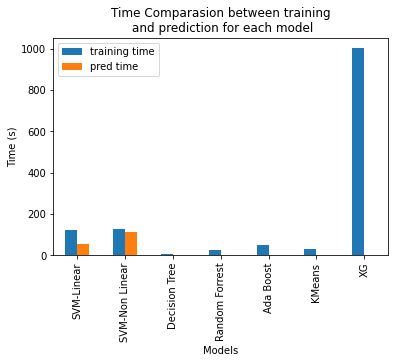

In [80]:
"""
Plotting results
1. Training time comparasion
2. Predicition time comparasion
"""
times = results[['training time', 'pred time']]
times.plot(kind='bar')
plt.title('Time Comparasion between training\n and prediction for each model')
plt.xlabel('Models')
plt.ylabel('Time (s)')


Text(0, 0.5, 'Accuracy %')

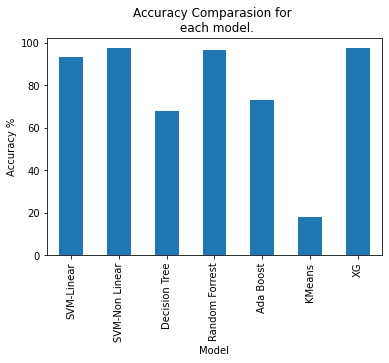

In [81]:
"""
3. Accuracy Comparasion
"""

acc = results['accuracy']
acc.plot(kind='bar')
plt.title('Accuracy Comparasion for \n each model.')
plt.xlabel("Model")
plt.ylabel('Accuracy %')

<AxesSubplot:>

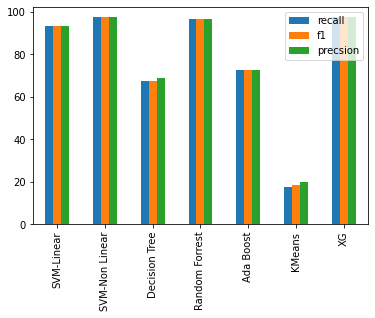

In [82]:
# 4. Recall Comparasion

recall = results[['recall', 'f1', 'precsion']]
recall.plot(kind='bar')
